In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
import seaborn as sns
mpl.rcParams['font.sans-serif'] = ['SimHei']
%matplotlib inline

In [2]:
subsidy_data=pd.read_table(r'E:/BaiduNetdiskDownload/jzzz/train/subsidy_train.txt',sep = ',',
                          names = ['user_id', 'subsidy'],
                          encoding='utf-8',header=None)
subsidy_data.head()

,user_id,subsidy
0,0,0
1,1,0
2,8,0
3,9,0
4,10,0


In [4]:
lines=len(subsidy_data)
lines

10885

In [5]:
# 领取助学金同学所占的比例
subsidy_group=subsidy_data.groupby(['subsidy'])['user_id'].count().reset_index().sort_values(['user_id'],ascending=False)
subsidy_group

,subsidy,user_id
0,0,9325
1,1000,741
2,1500,465
3,2000,354


In [6]:
subsidy_group=subsidy_group.rename(columns={'user_id': 'numbers'}) 
subsidy_group

,subsidy,numbers
0,0,9325
1,1000,741
2,1500,465
3,2000,354


Text(0.5,1,'助学金领取比例图')

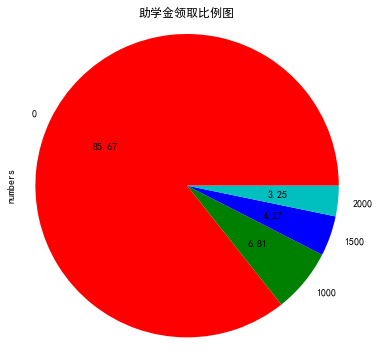

In [7]:
#饼状图
subsidy_group['numbers'].plot.pie(labels=['0','1000','1500','2000'],
                       colors=['r', 'g', 'b', 'c'],autopct='%.2f',fontsize=10, figsize=(6, 6),subplots=True)
plt.axis('equal')  #避免压缩成椭圆
explode = [0,0.1,0.1,0.1]
plt.title('助学金领取比例图')

In [7]:
#fig=plt.figure(figsize=(6,6))
#plt.style.use('ggplot')
#x=[0.8566,0.06807,0.04271,0.0325]
#labels=['0','1000','1500','2000']
#explode = [0,0.1,0.1,0.1]
#colors=['r', 'g', 'b', 'c']
#plt.axes(aspect='equal')   # 将横、纵坐标轴标准化处理，保证饼图是一个正圆，否则为椭圆
#plt.pie(x,explode=explode,labels=labels, colors=colors,autopct='%.2f%%')
#plt.title('助学金领取比例图')

Text(0.5,1,'助学金金额比例图')

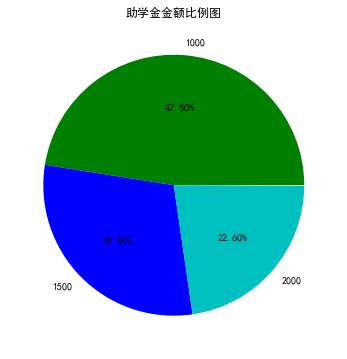

In [8]:
fig=plt.figure(figsize=(6,6))
y=[0.475,0.2980,0.226]
labels=['1000','1500','2000']
colors=['g', 'b', 'c']
plt.axes(aspect='equal')   # 将横、纵坐标轴标准化处理，保证饼图是一个正圆，否则为椭圆
plt.pie(y,labels=labels, colors=colors,autopct='%.2f%%')
plt.title('助学金金额比例图')

In [9]:
#将subsidy和score做一个联系处理 ,user_id基本一致

In [10]:
score_data=pd.read_table(r'E:/BaiduNetdiskDownload/jzzz/train/score_train.txt', sep = ',', quotechar =',',
                          names = ['user_id','department','ranking',],
                          encoding='utf-8',header=None)
score_data.head()

,user_id,department,ranking
0,0,9,1
1,1,9,2
2,8,6,1565
3,9,6,1570
4,10,3,1


In [11]:
lines=len(score_data)
lines   #存在大量缺失值

9130

In [12]:
#把两个表合并一下
df_inner=pd.merge(score_data,subsidy_data,how='inner')
df_inner.head()

,user_id,department,ranking,subsidy
0,0,9,1,0
1,1,9,2,0
2,8,6,1565,0
3,9,6,1570,0
4,10,3,1,0


In [13]:
df_inner=df_inner.sort_values(['department']) #按department进行排序
df_inner.tail(10)

,user_id,department,ranking,subsidy
6089,18384,19,419,0
6088,18379,19,414,0
6087,18378,19,413,0
6086,18365,19,400,1500
6085,18364,19,399,0
6084,18361,19,396,1000
6083,18360,19,395,0
6082,18359,19,394,1500
6092,18387,19,422,1000
6264,18833,19,862,0


In [31]:
df_inner.isnull().sum()

user_id       0
department    0
ranking       0
subsidy       0
dtype: int64

In [14]:
xy1=df_inner.loc[df_inner['department']==1]   
xy1.head()

,user_id,department,ranking,subsidy
6845,20563,1,144,0
8771,30505,1,351,0
8772,30507,1,352,0
8773,30509,1,353,0
94,267,1,292,0


In [15]:
lines=len(xy1)     # 学院1
lines      

128

In [16]:
xy1=xy1.sort_values('ranking') #存在缺失值，如何处理？
xy1=xy1.reset_index(drop=True) 
xy1[:20]
#缺少了大量数据，验证ranking和subsidy之间的相关性有困难。

,user_id,department,ranking,subsidy
0,10034,1,1,0
1,10035,1,2,0
2,10046,1,11,0
3,10047,1,12,1000
4,10054,1,19,0
5,10055,1,20,0
6,10056,1,21,0
7,10057,1,22,0
8,10058,1,23,0
9,10059,1,24,0


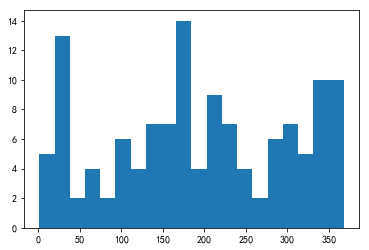

In [17]:
xy1['ranking']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(xy1["ranking"],bins=20)
plt.show()

In [18]:
xy1.mean()

user_id       19489.718750
department        1.000000
ranking         194.273438
subsidy         121.093750
dtype: float64

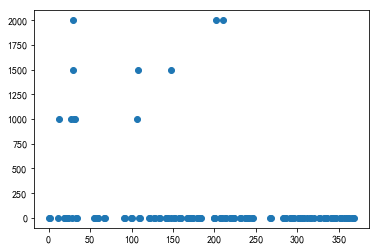

In [25]:
plt.plot(xy1['ranking'],xy1['subsidy'],'o')
#和scatter是一个效果

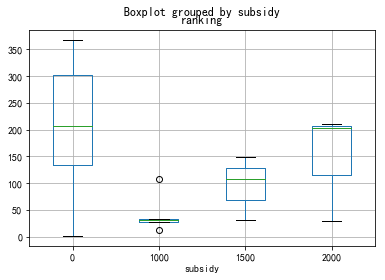

In [20]:
#排名的箱型图
xy1.boxplot(column='ranking',by='subsidy')

In [21]:
df_inner.loc[df_inner['department']==2]   
xy2=df_inner.loc[df_inner['department']==2] 
xy2.head()

,user_id,department,ranking,subsidy
6810,20444,2,125,0
6809,20441,2,122,0
6808,20440,2,121,0
6807,20435,2,116,0
6806,20434,2,115,0


In [22]:
xy2=xy2.sort_values('ranking') 
xy2.head()

,user_id,department,ranking,subsidy
3297,10006,2,5,0
3298,10007,2,6,0
3299,10014,2,13,0
3300,10015,2,14,0
3301,10016,2,15,0


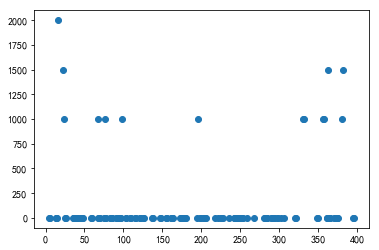

In [23]:
plt.scatter(xy2['ranking'],xy2['subsidy'])